In [92]:
# Version 1.2
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

import re #Module expressions régulières pour modifier certaines colones

## Partie 1 : Analyse des données

### Ouverture

In [93]:
#laptop_data = pd.read_csv(r'laptops.csv', sep=",", index_col=12, encoding='latin1') #J'ai modifié l'index pour la mettre sur le prix
laptop_data = pd.read_csv(r'laptops.csv', sep=",", encoding='latin1')

#### Suppression des colones inexploitables et autres premières modifs

In [94]:
#Suppression des colonnes inutiles
laptop_data = laptop_data.drop('Model Name', axis=1)
laptop_data = laptop_data.drop('Operating System Version', axis=1) 

laptop_data.rename(columns = {'Screen Size':'ScreenSize'}, inplace = True) # Suppression de l'espace dans le nom de la colonne

laptop_data['Price (Euros)'] = laptop_data['Price (Euros)'].str.replace(',', '.').astype('float64') # Convertir les prix en float64

In [95]:
laptop_data.head()

,Manufacturer,Category,ScreenSize,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price (Euros)
0,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [96]:
laptop_data.shape

(1303, 11)

In [97]:
laptop_data.dtypes

Manufacturer         object
Category             object
ScreenSize           object
Screen               object
CPU                  object
RAM                  object
 Storage             object
GPU                  object
Operating System     object
Weight               object
Price (Euros)       float64
dtype: object

In [116]:
#laptop_data.loc['Dell']
laptop_data["Price (Euros)"].describe()

count    1303.000000
mean     1123.686992
std       699.009043
min       174.000000
25%       599.000000
50%       977.000000
75%      1487.880000
max      6099.000000
Name: Price (Euros), dtype: float64

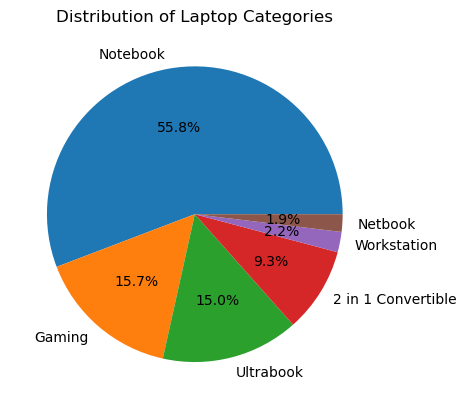

In [99]:
sizes = laptop_data['Category'].value_counts()
labels = sizes.index.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Laptop Categories')
plt.show()


c:\Users\Louis\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


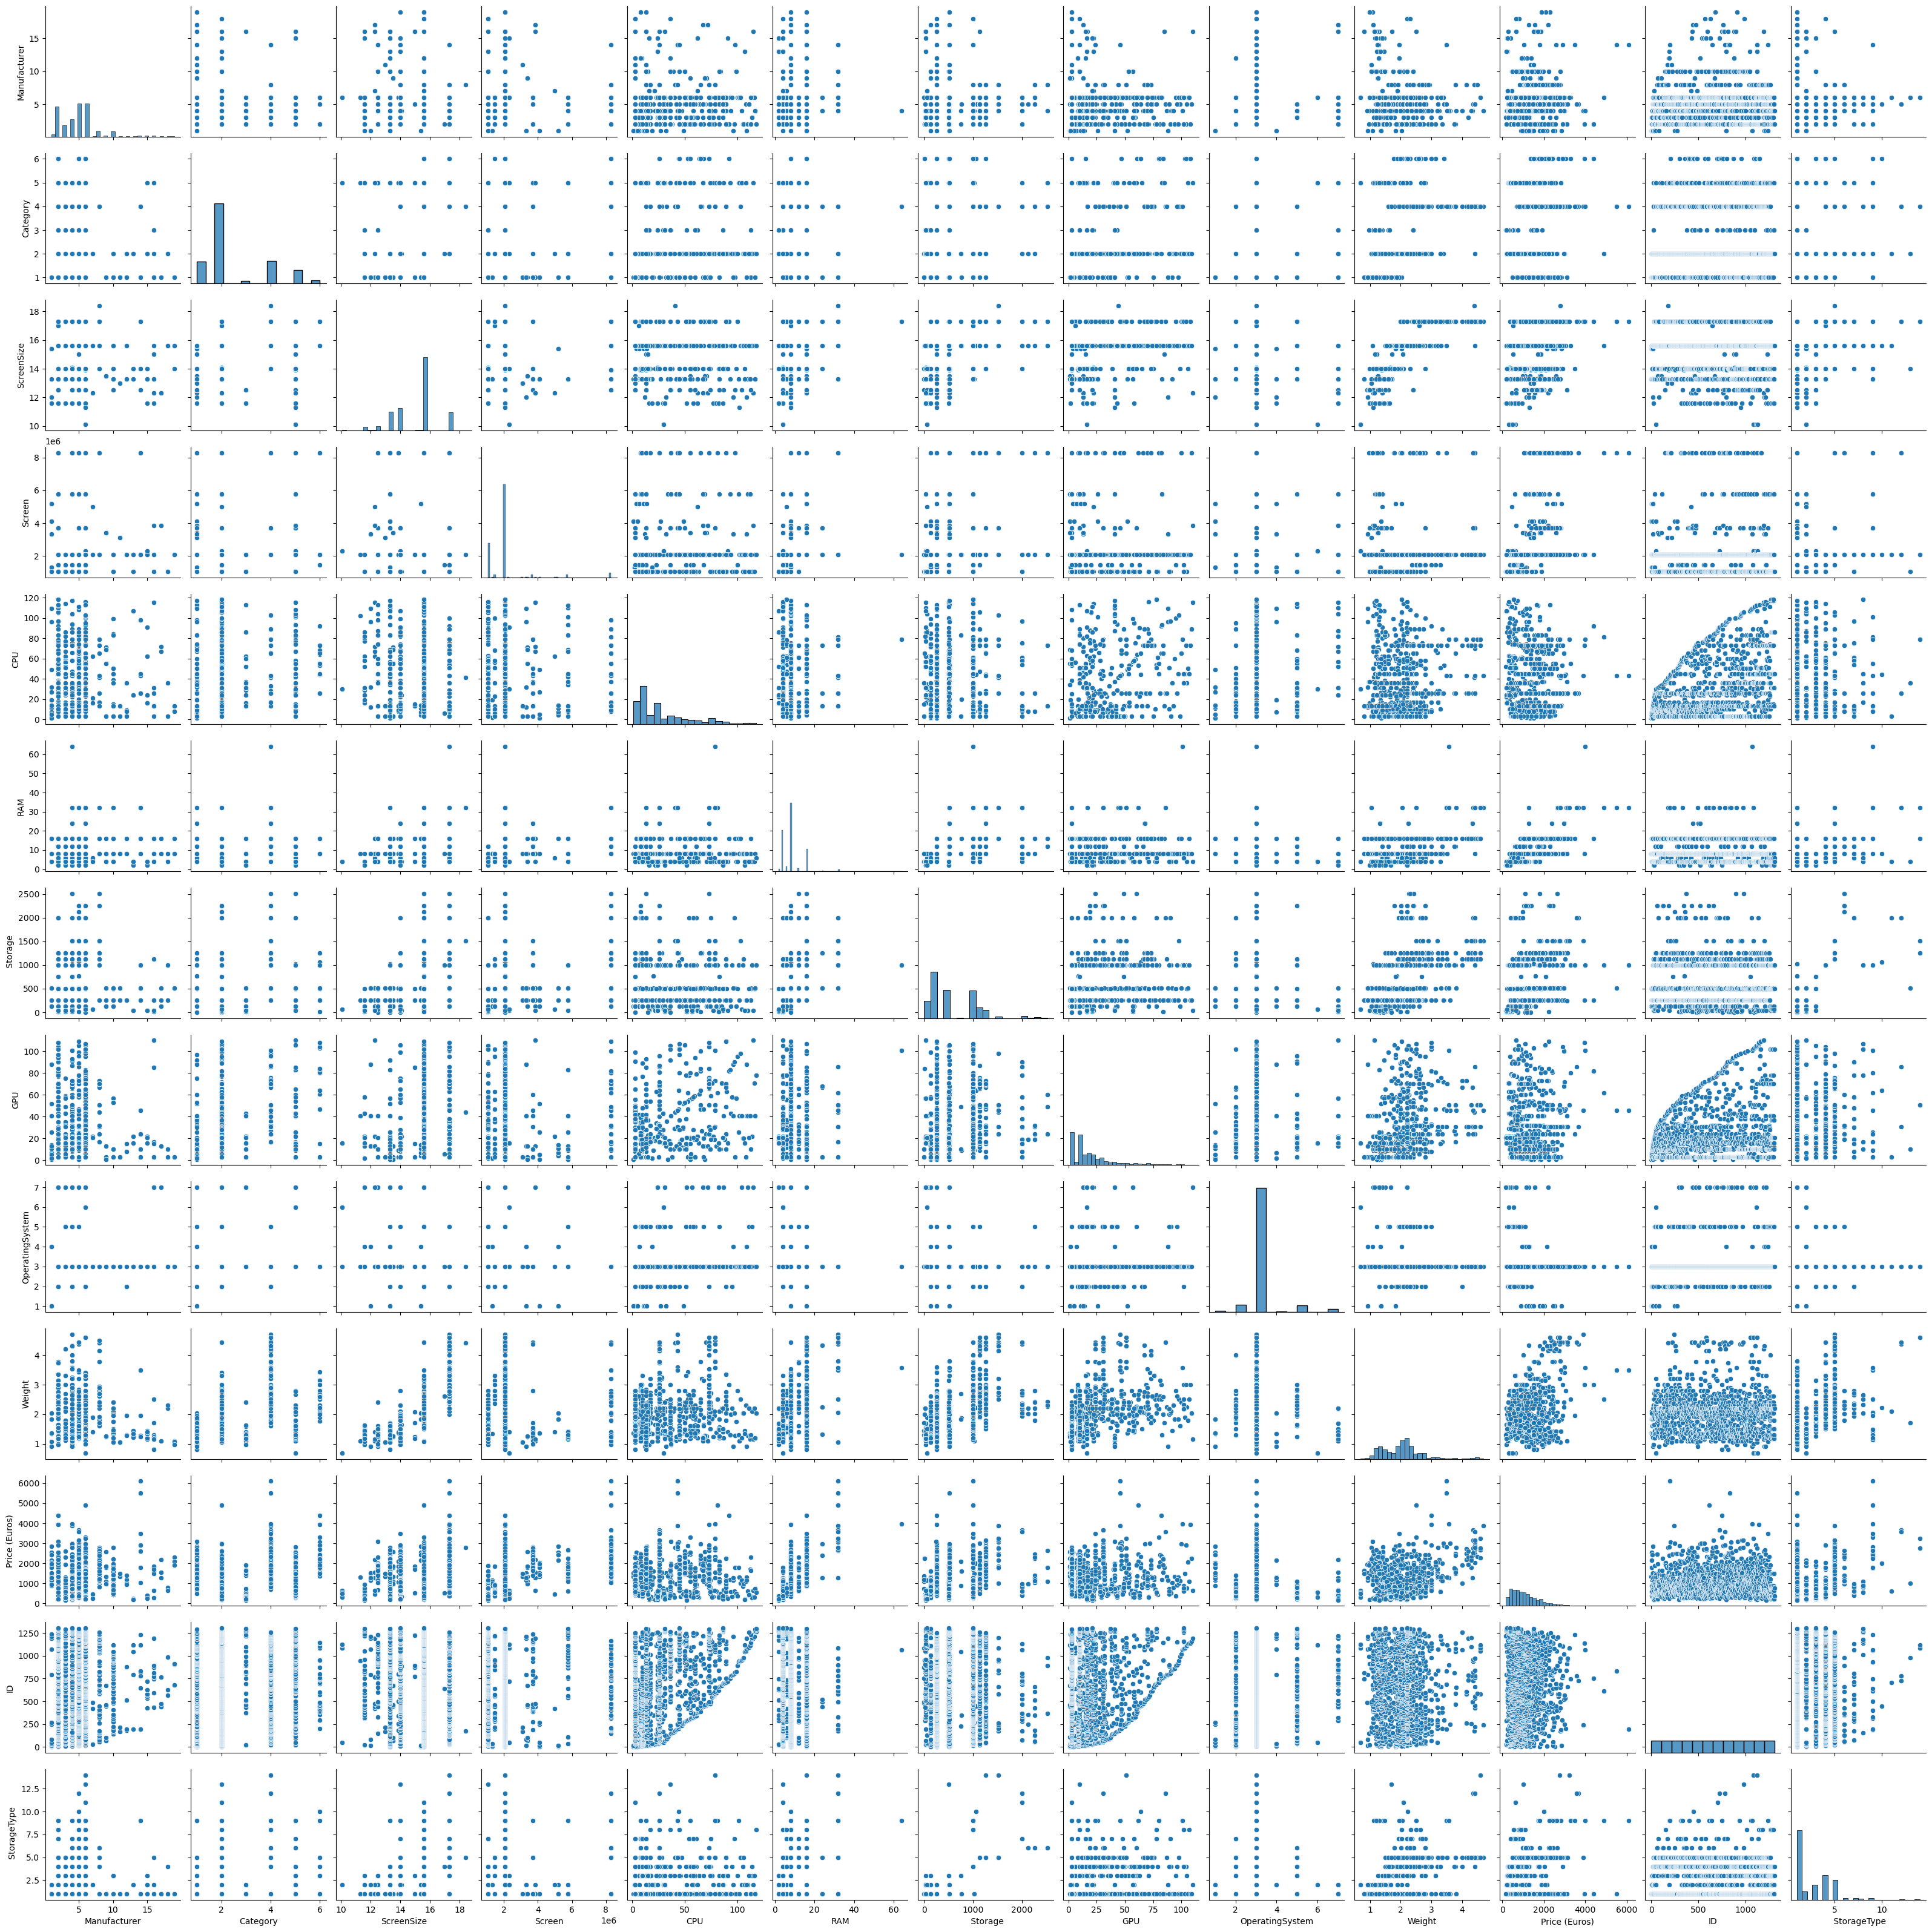

In [117]:
sns.pairplot(laptop_data)

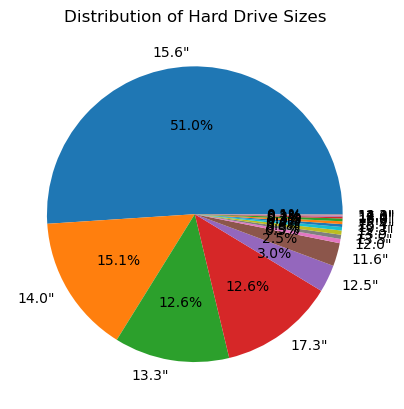

In [101]:
sizes = laptop_data['ScreenSize'].value_counts()
labels = sizes.index.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Hard Drive Sizes')
plt.show()


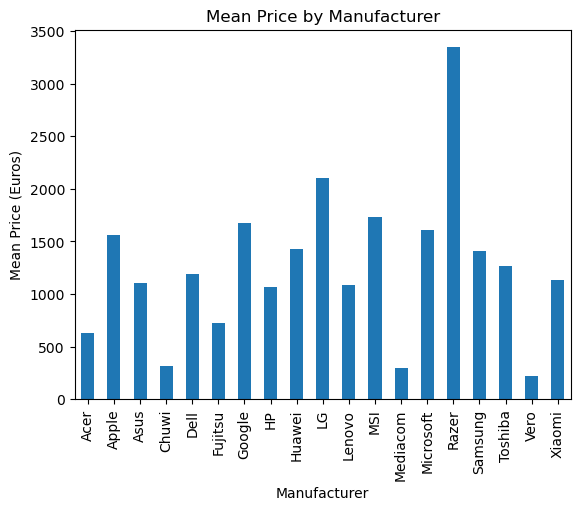

In [102]:
# group the data by manufacturer and calculate the mean price for each group
manufacturer_mean_price = laptop_data.groupby('Manufacturer')['Price (Euros)'].mean()

# plot the mean price by manufacturer
manufacturer_mean_price.plot(kind='bar')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price (Euros)')
plt.title('Mean Price by Manufacturer')
plt.show()



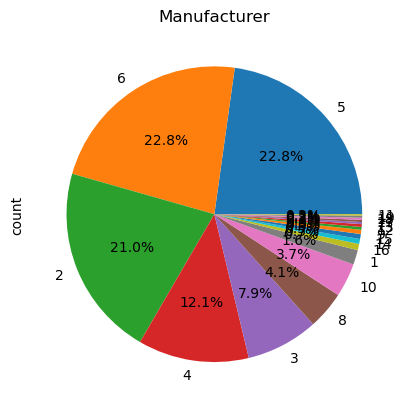

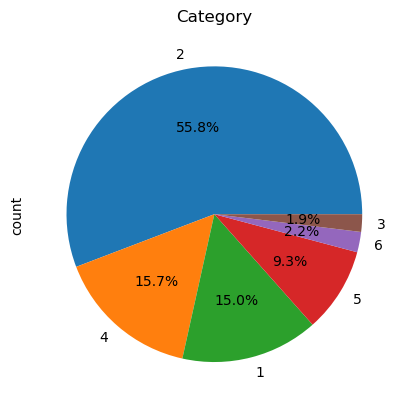

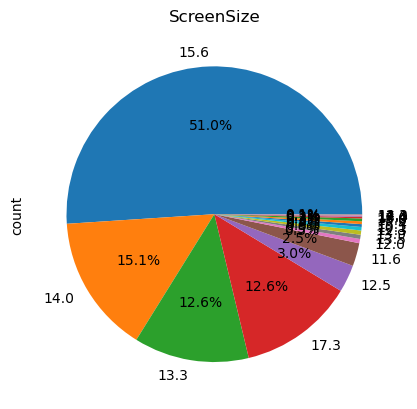

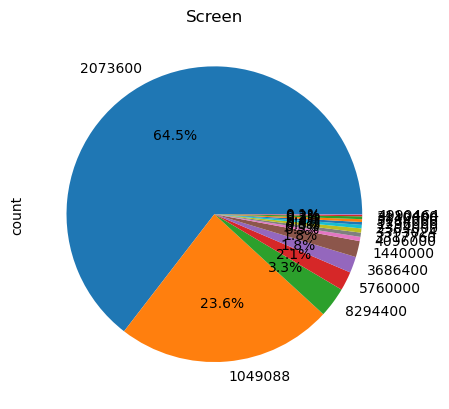

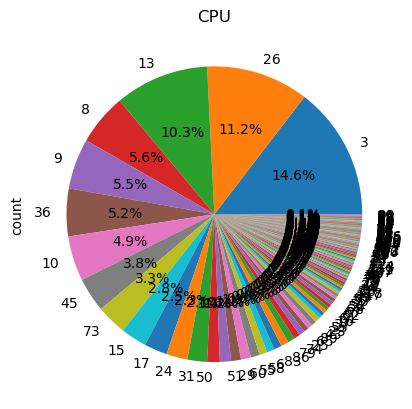

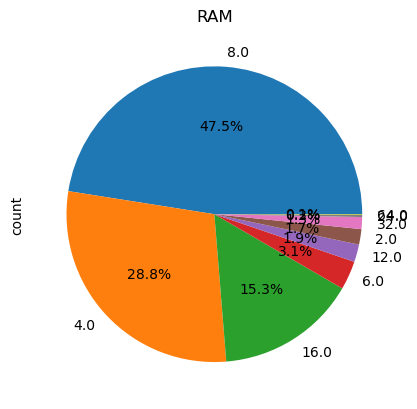

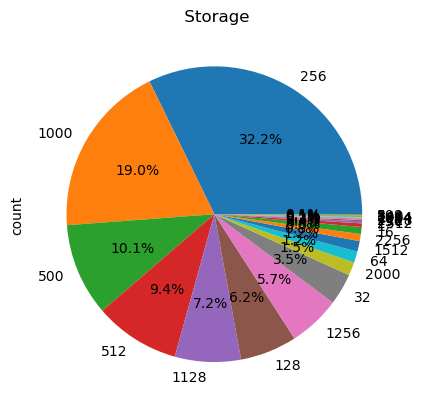

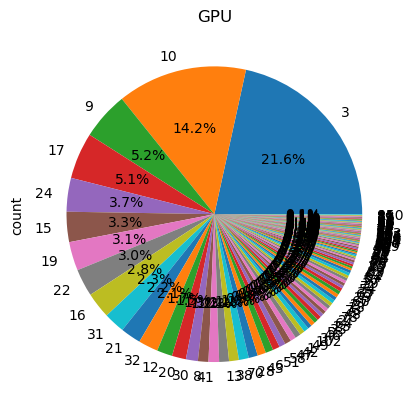

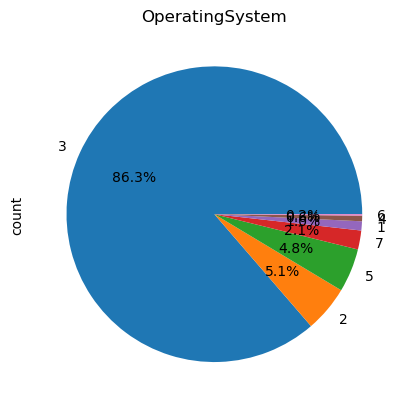

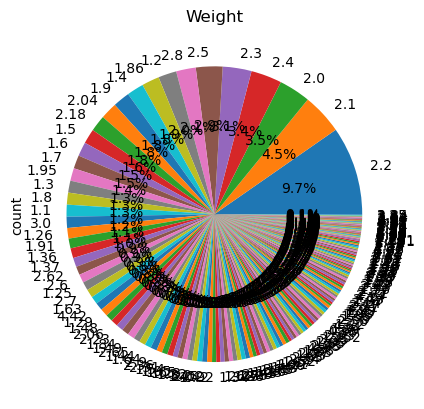

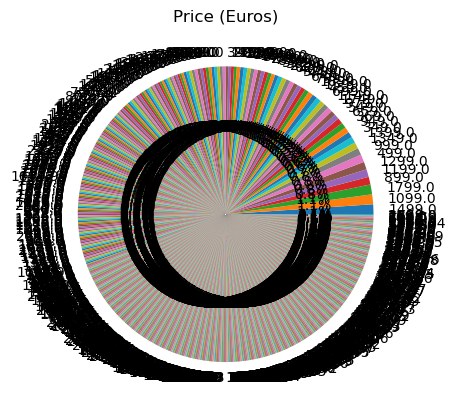

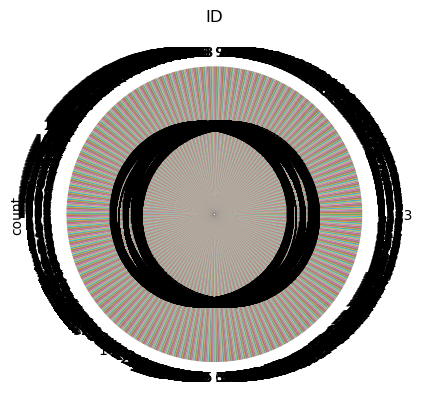

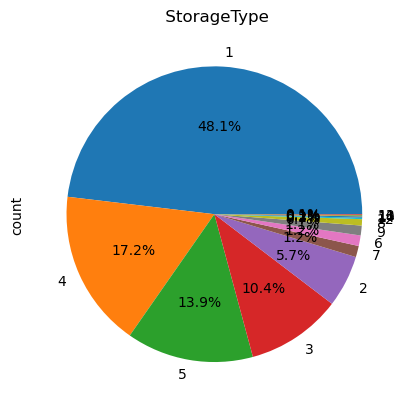

In [120]:
import matplotlib.pyplot as plt

for column in laptop_data.columns:
   laptop_data[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
   plt.title(column)
   plt.show()

## Partie 2 : Quantification du dataset

In [103]:
laptop_data['ID'] = range(1, len(laptop_data) + 1)

#### On convertit les valeurs de la catégorie et de l'OS en chiffre

In [104]:
print((laptop_data['Category'].unique()))

laptop_data.Category[laptop_data.Category == 'Ultrabook'] = 1
laptop_data.Category[laptop_data.Category == 'Notebook'] = 2
laptop_data.Category[laptop_data.Category == 'Netbook'] = 3
laptop_data.Category[laptop_data.Category == 'Gaming'] = 4
laptop_data.Category[laptop_data.Category == '2 in 1 Convertible'] = 5
laptop_data.Category[laptop_data.Category == 'Workstation'] = 6

laptop_data.rename(columns = {'Operating System':'OperatingSystem'}, inplace = True)
print((laptop_data['OperatingSystem'].unique()))

laptop_data.OperatingSystem[laptop_data.OperatingSystem== 'macOS'] = 1
laptop_data.OperatingSystem[laptop_data.OperatingSystem== 'No OS'] = 2
laptop_data.OperatingSystem[laptop_data.OperatingSystem== 'Windows'] = 3
laptop_data.OperatingSystem[laptop_data.OperatingSystem== 'Mac OS'] = 4
laptop_data.OperatingSystem[laptop_data.OperatingSystem== 'Linux'] = 5
laptop_data.OperatingSystem[laptop_data.OperatingSystem== 'Android'] = 6
laptop_data.OperatingSystem[laptop_data.OperatingSystem== 'Chrome OS'] = 7

print((laptop_data['Manufacturer'].unique()))

laptop_data.Manufacturer[laptop_data.Manufacturer== 'Apple'] = 1
laptop_data.Manufacturer[laptop_data.Manufacturer== 'HP'] = 2
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Acer'] = 3
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Asus'] = 4
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Dell'] = 5
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Lenovo'] = 6
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Chuwi'] = 7
laptop_data.Manufacturer[laptop_data.Manufacturer== 'MSI'] = 8
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Microsoft'] = 9
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Toshiba'] = 10
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Huawei'] = 11
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Xiaomi'] = 12
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Vero'] = 13
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Razer'] = 14
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Mediacom'] = 15
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Samsung'] = 16
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Google'] = 17
laptop_data.Manufacturer[laptop_data.Manufacturer== 'Fujitsu'] = 18
laptop_data.Manufacturer[laptop_data.Manufacturer== 'LG'] = 19

['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
['macOS' 'No OS' 'Windows' 'Mac OS' 'Linux' 'Android' 'Chrome OS']
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


C:\Users\Louis\AppData\Local\Temp\ipykernel_11120\3230875271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_data.Category[laptop_data.Category == 'Ultrabook'] = 1
C:\Users\Louis\AppData\Local\Temp\ipykernel_11120\3230875271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_data.Category[laptop_data.Category == 'Notebook'] = 2
C:\Users\Louis\AppData\Local\Temp\ipykernel_11120\3230875271.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

#### Attribution des numéros pour les marques

In [105]:
gpu_mapping = {} 
gpu = laptop_data['GPU'].unique()
cpu_mapping = {}
cpu = laptop_data['CPU'].unique()

for i, gpu in enumerate(gpu, start=1):
    gpu_mapping[gpu] = i

for i, cpu in enumerate(cpu, start=1):
    cpu_mapping[cpu] = i

laptop_data['GPU'] = laptop_data['GPU'].map(gpu_mapping)

laptop_data['CPU'] = laptop_data['CPU'].map(cpu_mapping)


#### Transformation de certaines colones

In [106]:
#On supprime les unités à la fin de la colone Weight, Screen Size et RAM
laptop_data['Weight'] = laptop_data['Weight'].str.replace('kg', '').str.replace('s', '').astype(float)

laptop_data['ScreenSize'] = laptop_data['ScreenSize'].str.replace('"', '').astype(float)

laptop_data['RAM'] = laptop_data['RAM'].str.replace('GB', '').str.replace('s', '').astype(float)

#Pour la colone ScreenSize, on supprime tout ce qu'il y a avant la taille avec re (module d'expressions régulières)
laptop_data['Screen'] = laptop_data['Screen'].apply(lambda x: re.findall('\d{4}x\d{4}|\d{4}x\d{3}', x)[0] if isinstance(x, str) else x)
#Ensuite on sépare la première taille de la deuxième
laptop_data['Screen'] = laptop_data['Screen'].str.split('x', n=1)
#Ensuite on fait la multiplication afin d'avoir un seul chiffre
laptop_data['Screen'] = laptop_data['Screen'].apply(lambda x: int(x[0]) * int(x[1]) if isinstance(x, list) and len(x) == 2 else x)

In [107]:
print (laptop_data[' Storage'].unique())

['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '1GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '512GB SSD +  1TB Hybrid' '256GB SSD +  1TB Hybrid']


In [108]:
laptop_data[' StorageType'] = laptop_data[' Storage'].str.replace('.*GB', '', regex=True)
print (laptop_data[' StorageType'].unique())

[' SSD' ' Flash Storage' ' HDD' '1TB HDD' ' SSD +  1TB HDD'
 ' SSD +  2TB HDD' '2TB HDD' '1TB Hybrid' '1TB SSD'
 ' Flash Storage +  1TB HDD' '1TB HDD +  1TB HDD' '1TB SSD +  1TB HDD'
 ' Hybrid' ' SSD +  1TB Hybrid']


In [109]:
storagetype_mapping = {} 
storagetype = laptop_data[' StorageType'].unique()

for i, storage in enumerate(storagetype, start=1):
    storagetype_mapping[storage] = i

laptop_data[' StorageType'] = laptop_data[' StorageType'].map(storagetype_mapping)

In [110]:
Storage_mapping = {
    '256GB SSD': 256,
    '1TB HDD': 1000,
    '500GB HDD': 500,
    '512GB SSD': 512,
    '128GB SSD +  1TB HDD': 128 + 1000,
    '128GB SSD': 128,
    '256GB SSD +  1TB HDD': 256 + 1000,
    '32GB Flash Storage': 32,
    '2TB HDD': 2000,
    '64GB Flash Storage': 64,
    '512GB SSD +  1TB HDD': 512 + 1000,
    '1TB SSD': 1000,
    '256GB SSD +  2TB HDD': 256 + 2000,
    '1TB Hybrid': 1000,
    '256GB Flash Storage': 256,
    '16GB Flash Storage': 16,
    '32GB SSD': 32,
    '1GB SSD': 1,
    '128GB Flash Storage': 128,
    '512GB SSD +  2TB HDD': 512 + 2000,
    '16GB SSD': 16,
    '128GB SSD +  2TB HDD': 128 + 2000,
    '1TB SSD +  1TB HDD': 1000 + 1000,
    '256GB SSD +  500GB HDD': 256 + 500,
    '512GB Flash Storage': 512,
    '256GB SSD +  256GB SSD': 256 + 256,
    '512GB SSD +  512GB SSD': 512 + 512,
    '8GB SSD': 8,
    '64GB Flash Storage +  1TB HDD': 64 + 1000,
    '256GB SSD +  1TB Hybrid': 256 + 1000,
    '128GB HDD': 128,
    '1TB HDD +  1TB HDD': 1000 + 1000,
    '240GB SSD': 240,
    '32GB HDD': 32,
    '64GB SSD': 64,
    '512GB SSD +  1TB Hybrid': 512 + 1000,
    '508GB Hybrid': 508,
    '512GB SSD +  256GB SSD': 512 + 256
}

laptop_data[' Storage'] = laptop_data[' Storage'].replace(Storage_mapping)

In [111]:
#laptop_data['Weight'] = laptop_data['Weight'].astype(int)

In [112]:
laptop_data.head()

,Manufacturer,Category,ScreenSize,Screen,CPU,RAM,Storage,GPU,OperatingSystem,Weight,Price (Euros),ID,StorageType
0,1,1,13.3,4096000,1,8.0,128,1,1,1.37,1339.69,1,1
1,1,1,13.3,1296000,2,8.0,128,2,1,1.34,898.94,2,2
2,2,2,15.6,2073600,3,8.0,256,3,2,1.86,575.00,3,1
3,1,1,15.4,5184000,4,16.0,512,4,1,1.83,2537.45,4,1
4,1,1,13.3,4096000,5,8.0,256,5,1,1.37,1803.60,5,1
